## LSTM tutorial pytorch


More tutorials can be found here:

- https://github.com/spro/practical-pytorch

In [76]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

## Generate data

In [23]:
np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) +  np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(0.7*x / 1.0 / T).astype('float64') 
torch.save(data, open('traindata.pt', 'wb'))

print("data.shape:      \t\t", data.shape)
print("data[1:].shape: \t\t", data[1,:].shape)

data.shape:      		 (100, 1000)
data[1:].shape: 		 (1000,)


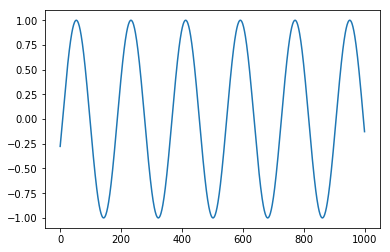

In [24]:
plt.plot(data[1,:])
plt.show()

### LSTM and LSTMCell from pytorch

About LSTM and LSTM cell

- https://discuss.pytorch.org/t/different-between-lstm-and-lstmcell-function/5657


About timeseries prediction

- http://www.jakob-aungiers.com/articles/a/LSTM-Neural-Network-for-Time-Series-Prediction

#### Help function of torch.nn.LSTM


    class LSTM(RNNBase)
       Applies a multi-layer long short-term memory (LSTM) RNN to an input
       sequence.
       
       
       For each element in the input sequence, each layer computes the following
       function:
       
       .. math::
       
               \begin{array}{ll}
               i_t = \mathrm{sigmoid}(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
               f_t = \mathrm{sigmoid}(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
               g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hc} h_{(t-1)} + b_{hg}) \\
               o_t = \mathrm{sigmoid}(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
               c_t = f_t * c_{(t-1)} + i_t * g_t \\
               h_t = o_t * \tanh(c_t)
               \end{array}
       
       where :math:`h_t` is the hidden state at time `t`, :math:`c_t` is the cell
       state at time `t`, :math:`x_t` is the hidden state of the previous layer at
       time `t` or :math:`input_t` for the first layer, and :math:`i_t`,
       :math:`f_t`, :math:`g_t`, :math:`o_t` are the input, forget, cell,
       and out gates, respectively.
       
       Args:
           input_size: The number of expected features in the input x
           hidden_size: The number of features in the hidden state h
           num_layers: Number of recurrent layers.
           bias: If False, then the layer does not use bias weights b_ih and b_hh.
               Default: True
           batch_first: If True, then the input and output tensors are provided
               as (batch, seq, feature)
           dropout: If non-zero, introduces a dropout layer on the outputs of each
               RNN layer except the last layer
           bidirectional: If True, becomes a bidirectional RNN. Default: False
       
       Inputs: input, (h_0, c_0)
           - **input** (seq_len, batch, input_size): tensor containing the features
             of the input sequence.
             The input can also be a packed variable length sequence.
             See :func:`torch.nn.utils.rnn.pack_padded_sequence` for details.
           - **h_0** (num_layers \* num_directions, batch, hidden_size): tensor
             containing the initial hidden state for each element in the batch.
           - **c_0** (num_layers \* num_directions, batch, hidden_size): tensor
             containing the initial cell state for each element in the batch.
       
       
       Outputs: output, (h_n, c_n)
           - **output** (seq_len, batch, hidden_size * num_directions): tensor
             containing the output features `(h_t)` from the last layer of the RNN,
             for each t. If a :class:`torch.nn.utils.rnn.PackedSequence` has been
             given as the input, the output will also be a packed sequence.
           - **h_n** (num_layers * num_directions, batch, hidden_size): tensor
             containing the hidden state for t=seq_len
           - **c_n** (num_layers * num_directions, batch, hidden_size): tensor
             containing the cell state for t=seq_len
       
       Attributes:
           weight_ih_l[k] : the learnable input-hidden weights of the k-th layer
               `(W_ii|W_if|W_ig|W_io)`, of shape `(4*hidden_size x input_size)`
           weight_hh_l[k] : the learnable hidden-hidden weights of the k-th layer
               `(W_hi|W_hf|W_hg|W_ho)`, of shape `(4*hidden_size x hidden_size)`
           bias_ih_l[k] : the learnable input-hidden bias of the k-th layer
               `(b_ii|b_if|b_ig|b_io)`, of shape `(4*hidden_size)`
           bias_hh_l[k] : the learnable hidden-hidden bias of the k-th layer
               `(b_hi|b_hf|b_hg|b_ho)`, of shape `(4*hidden_size)`
       
       Examples::
       
           >>> rnn = nn.LSTM(10, 20, 2)
           >>> input = Variable(torch.randn(5, 3, 10))
           >>> h0 = Variable(torch.randn(2, 3, 20))
           >>> c0 = Variable(torch.randn(2, 3, 20))
           >>> output, hn = rnn(input, (h0, c0))
       
       
#### Help function of torch.nn.LSTMCell

    class LSTMCell(RNNCellBase)
       A long short-term memory (LSTM) cell.

       .. math::

           \begin{array}{ll}
           i = \mathrm{sigmoid}(W_{ii} x + b_{ii} + W_{hi} h + b_{hi}) \\
           f = \mathrm{sigmoid}(W_{if} x + b_{if} + W_{hf} h + b_{hf}) \\
           g = \tanh(W_{ig} x + b_{ig} + W_{hc} h + b_{hg}) \\
           o = \mathrm{sigmoid}(W_{io} x + b_{io} + W_{ho} h + b_{ho}) \\
           c' = f * c + i * g \\
           h' = o * \tanh(c') \\
           \end{array}

       Args:
           input_size: The number of expected features in the input x
           hidden_size: The number of features in the hidden state h
           bias: If `False`, then the layer does not use bias weights `b_ih` and
               `b_hh`. Default: True

       Inputs: input, (h_0, c_0)
           - **input** (batch, input_size): tensor containing input features
           - **h_0** (batch, hidden_size): tensor containing the initial hidden
             state for each element in the batch.
           - **c_0** (batch. hidden_size): tensor containing the initial cell state
             for each element in the batch.

       Outputs: h_1, c_1
           - **h_1** (batch, hidden_size): tensor containing the next hidden state
             for each element in the batch
           - **c_1** (batch, hidden_size): tensor containing the next cell state
             for each element in the batch

       Attributes:
           weight_ih: the learnable input-hidden weights, of shape
               `(4*hidden_size x input_size)`
           weight_hh: the learnable hidden-hidden weights, of shape
               `(4*hidden_size x hidden_size)`
           bias_ih: the learnable input-hidden bias, of shape `(4*hidden_size)`
           bias_hh: the learnable hidden-hidden bias, of shape `(4*hidden_size)`

       Examples::

           >>> rnn = nn.LSTMCell(10, 20)
           >>> input = Variable(torch.randn(6, 3, 10))
           >>> hx = Variable(torch.randn(3, 20))
           >>> cx = Variable(torch.randn(3, 20))
           >>> output = []
           >>> for i in range(6):
           ...     hx, cx = rnn(input[i], (hx, cx))
           ...     output.append(hx)

       Method resolution order:
           LSTMCell
           RNNCellBase
           torch.nn.modules.module.Module
           builtins.object


## Inspecting LSTM from torch.nn


- Pytorch's LSTM expects all of its inputs to be 3D tensors
- The semantics of the axes of these tensors is important. 
    - The first axis is the sequence itself
    - the second indexes instances in the mini-batch,
    - the third indexes elements of the input. 

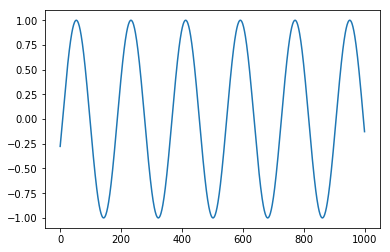

In [33]:
plt.plot(data[1, :])

In [52]:
n_features  = 1
n_samples   = data.shape[1]

hidden_size = 200

print("n_features:  \t", n_features)
print("n_samples:   \t",  n_samples)
print("hidden_size: \t", hidden_size)

n_features:  	 1
n_samples:   	 1000
hidden_size: 	 200


In [53]:
# aux = torch.nn.LSTM(hidden_size, input_size, num_layers)
lstm = torch.nn.LSTM(hidden_size=hidden_size, input_size=n_features)

#### All weights can be found in lstm.all_weights[0]

In [54]:
len(lstm.all_weights[0])

4

In [55]:
for i in range(len(lstm.all_weights[0])):
    print(type(lstm.all_weights[0][i]))

<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>


In [56]:
print(lstm.all_weights[0][0].size())
print(lstm.all_weights[0][1].size())
print(lstm.all_weights[0][2].size())
print(lstm.all_weights[0][3].size())

torch.Size([800, 1])
torch.Size([800, 200])
torch.Size([800])
torch.Size([800])


#### Stacking LSTMs

In [57]:
aux = torch.nn.LSTM(10, 20, 2)

print("len(aux.state_dict()): \t\t", len(aux.state_dict()))
print("len(aux.all_weights): \t\t",  len(aux.all_weights))
print("length all_weights per layer: ", [len(all_weights) for all_weights in aux.all_weights] )

len(aux.state_dict()): 		 8
len(aux.all_weights): 		 2
length all_weights per layer:    [4, 4]


In [58]:
aux = torch.nn.LSTM(10, 20, 3)

print("len(aux.state_dict()): \t\t", len(aux.state_dict()))
print("len(aux.all_weights): \t\t", len(aux.all_weights))
print("length all_weights per layer:   ", [len(all_weights) for all_weights in aux.all_weights] )

len(aux.state_dict()): 		 12
len(aux.all_weights): 		 3
length all_weights per layer:    [4, 4, 4]


## Forward pass LSTM

In [59]:
np.random.seed(2)
T = 20   
L = 1000 
N = 100  

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) +  np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(0.7 * x / 1.0 / T).astype('float64') 
torch.save(data, open('traindata.pt', 'wb'))

data = torch.Tensor(data)

In [60]:
data.shape

torch.Size([100, 1000])

In [61]:
lstm = torch.nn.LSTM(hidden_size=100, input_size=10)

In [62]:
help(lstm.forward)

Help on method forward in module torch.nn.modules.rnn:

forward(input, hx=None) method of torch.nn.modules.rnn.LSTM instance
    Defines the computation performed at every call.
    
    Should be overriden by all subclasses.



#### forward pass single example

In [63]:
X = torch.autograd.Variable(torch.rand(500, 10))

In [64]:
x = X[1:2, :]
x.size()

torch.Size([1, 10])

In [65]:
aux = lstm.forward(x)

In [66]:
aux[0].size()

torch.Size([1, 10, 100])

In [67]:
print("type component 0 lstm.forward: \t", type(aux[0]))
print("type component 1 lstm.forward: \t", type(aux[1]))

print("\n")
print("size compoment 0 lstm.forward: \t", aux[0].size())
print("len  component 1 lstm.forward: \t", len(aux[1]))

print("\n")
print("size compoment 1,0 lstm.forward: \t", aux[1][0].size())
print("size compoment 1,1 lstm.forward: \t", aux[1][1].size())

type component 0 lstm.forward: 	 <class 'torch.autograd.variable.Variable'>
type component 1 lstm.forward: 	 <class 'tuple'>


size compoment 0 lstm.forward: 	 torch.Size([1, 10, 100])
len  component 1 lstm.forward: 	 2


size compoment 1,0 lstm.forward: 	 torch.Size([1, 10, 100])
size compoment 1,1 lstm.forward: 	 torch.Size([1, 10, 100])


#### forward minibatch

we can do `lstm.forward(input, hidden)` or simply `lstm(input, hidden)` to make a forward pass. Both functions (which do the same operation) return the output of the lsm and the current hidden state after the forward pass.

    lstm_out, hidden = lstm.forward(input, hidden)


In [144]:
x = X[0:20, :]
x.size()

torch.Size([20, 10])

In [151]:
lstm.weight_hh_l0

torch.Size([400, 100])

In [154]:
aux  = lstm.forward(x)
aux2 = lstm(x)

In [155]:
aux[0].size()

torch.Size([20, 10, 100])

In [156]:
aux[1][0].size(), aux[1][1].size()

(torch.Size([1, 10, 100]), torch.Size([1, 10, 100]))